In [2]:
import pandas as pd

df_cleaned = pd.read_csv('cleaned_philippine_foundations.csv')
print(df_cleaned.head())

                      Foundation_Name     Owner/Founder Founding_Date  \
0                   Kapit-bisig Trust     Juan Bautista    1994-09-04   
1                      Tahanan Center     Maya Gonzales    2018-12-05   
2                       Bukas Project   Maria Dela Cruz    1978-05-29   
3                     Tahanan Council  Evelyn Dela Cruz    2020-05-08   
4  Malasakit Foundation for Education        Ruben Cruz    2007-08-21   

         Location  Assets_PHP  No_of_Members     Type_of_Foundation  
0          Makati      802957             15              Religious  
1  Zamboanga City      374776             40             Charitable  
2         Bacolod     4676412             45            Educational  
3      Valenzuela       50000           1844             Charitable  
4     Iloilo City     5796315            151  Community Development  


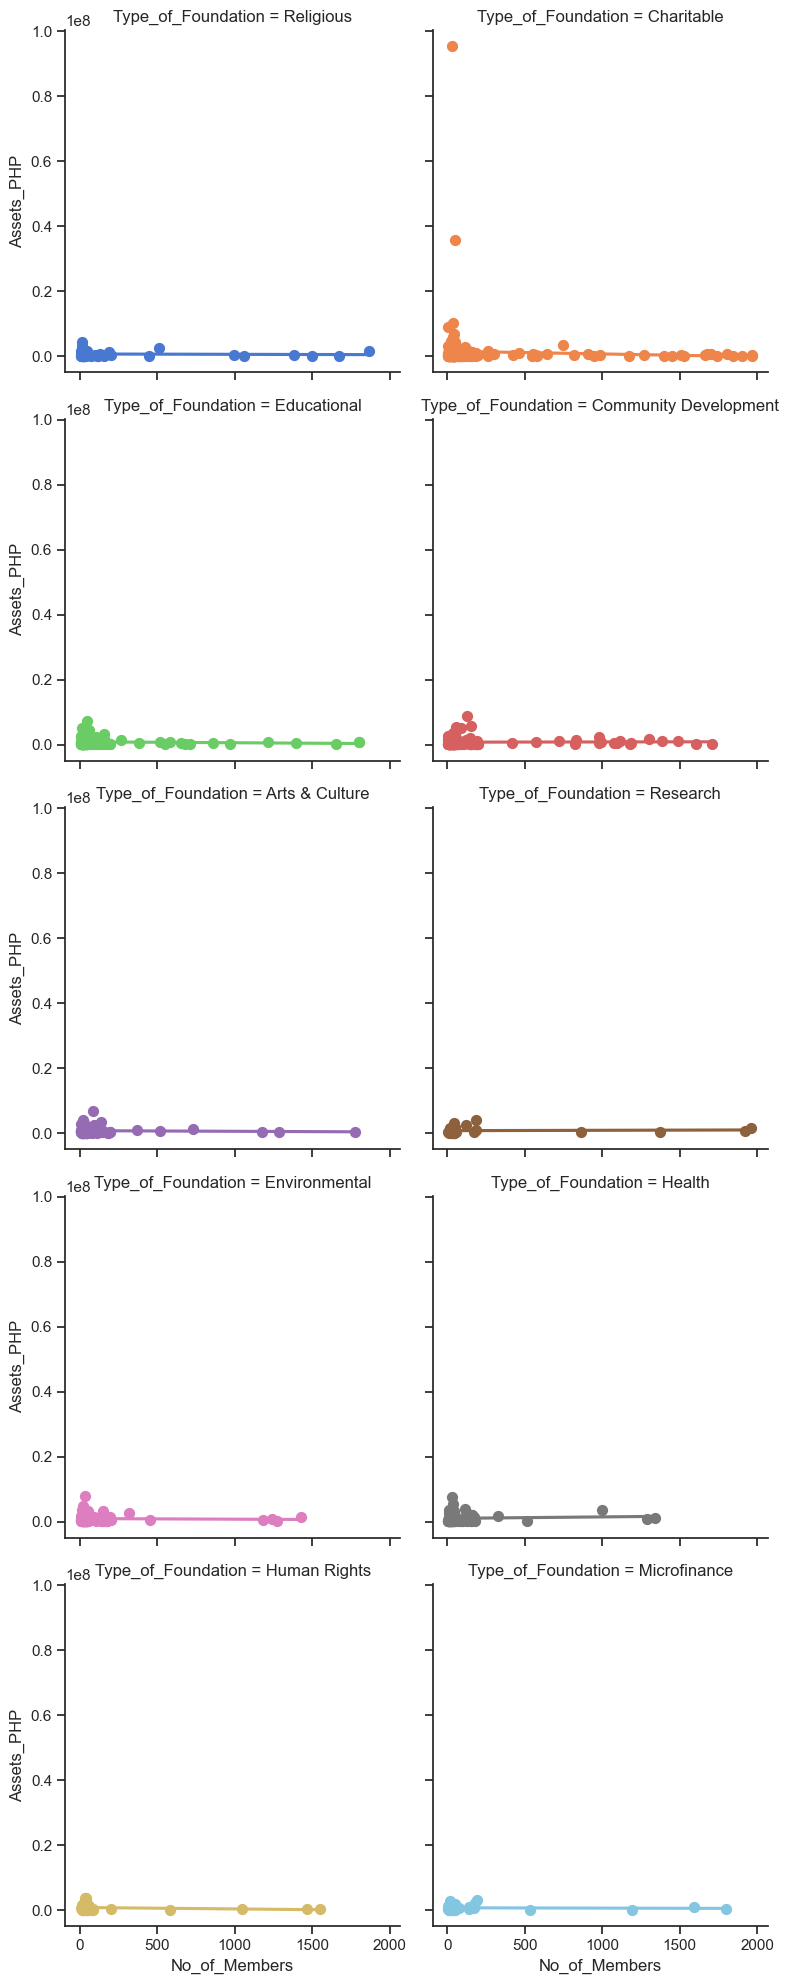

In [3]:
#  https://seaborn.pydata.org/examples/anscombes_quartet.html
import seaborn as sns
sns.set_theme(style="ticks")

sns.lmplot(
    data=df_cleaned, x="No_of_Members", y="Assets_PHP", col="Type_of_Foundation", hue="Type_of_Foundation",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [4]:
import plotly.express as px

fig = px.density_heatmap(df_cleaned, x="Founding_Date", y="Assets_PHP")
fig.show()

In [8]:
import pandas as pd

from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

p = figure(width=800, height=250, x_axis_type="datetime")

# Plot stock data
for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral5[:4]):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, legend_label=name)

# Convert Founding_Date to datetime and plot foundation data
df_cleaned['Founding_Date'] = pd.to_datetime(df_cleaned['Founding_Date'])
p.line(df_cleaned['Founding_Date'], df_cleaned['Assets_PHP'], line_width=2, color=Spectral5[4], legend_label="Phil Foundations Assets")

p.legend.location = "top_left"
p.legend.title = 'Stock/Assets'
p.legend.title_text_font_style = "bold"
p.legend.title_text_font_size = "20px"

show(p)

In [10]:
from bokeh.plotting import figure, show

plot = figure(width=400, height=400, tools="tap", title="Select a circle")
renderer = plot.scatter(
    x=df_cleaned['Assets_PHP'],
    y=df_cleaned['No_of_Members'],
    size=50,

    # set visual properties for selected glyphs
    selection_color="firebrick",

    # set visual properties for non-selected glyphs
    nonselection_fill_alpha=0.2,
    nonselection_fill_color="blue",
    nonselection_line_color="firebrick",
    nonselection_line_alpha=1.0,
)

show(plot)